# Notebook for cleanning, EDA, and Model Development
---
*By Patcharanat P.*

## Load Data

In [1]:
import numpy as np
import pandas as pd
# import requests
# import io

In [2]:
# response = requests.get("https://github.com/Patcharanat/GrabSpark-Data-Analytics-for-Business-Use-Cases/blob/master/sample_a.csv")
# pd.read_csv(response.content)
# pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# must use raw file
# response = requests.get("https://raw.githubusercontent.com/Patcharanat/ecommerce-invoice/master/data/cleaned_data.csv")
# content = response.text
# print(content)

## Data Cleaning

In [2]:
# df = pd.read_csv("./data/uncleaned_data.csv", encoding='cp1252')
# df = pd.read_csv("./data/uncleaned_data.csv")
# df = pd.read_csv("./data/data_url_uncleaned.csv", low_memory=False)
# df = pd.read_csv("./data/data_api_uncleaned.csv", encoding='cp1252')
# df = pd.read_csv("./data/data_postgres_cleaned.csv", encoding='cp1252')
# df = pd.read_csv("./data/data_postgres_cleaned.csv")
# df = pd.read_csv("./data/data_api_uncleaned.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/Patcharanat/ecommerce-invoice/master/data/cleaned_data.csv")
df = pd.read_parquet("./data/staging_area_ecomm_invoice_transaction.parquet")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [38]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
df.loc[df['Description'].isnull()].head()
# df.loc[df['Description'].isnull() & df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [40]:
df.loc[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [41]:
df.loc[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [42]:
df.loc[df['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [43]:
df.loc[df['StockCode'] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,12/21/2010 15:18,2.55,NaN,United Kingdom


In [44]:
df.loc[df['InvoiceNo'] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.5,14527.0,United Kingdom


<AxesSubplot:>

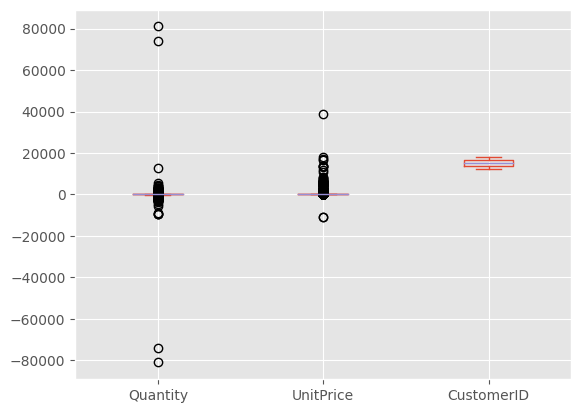

In [45]:
df.plot(kind='box')

### Fill NA

In [46]:
df_temp = df.copy()

In [47]:
df_temp['Description'] = df['Description'].fillna('No Description')

In [48]:
df_temp['CustomerID'] = df['CustomerID'].fillna(0)
df_temp['CustomerID'] = df_temp['CustomerID'].astype(float).astype(int)

In [49]:
df_temp['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [50]:
df_temp.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [51]:
df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [52]:
df_temp['InvoiceNo'] = df_temp['InvoiceNo'].astype(str)
df_temp['StockCode'] = df_temp['StockCode'].astype(str)
df_temp['Description'] = df_temp['Description'].astype(str)
# df_temp['Quantity'] = df_temp['Quantity']
# df_temp['InvoiceDate'] = df_temp['InvoiceDate']
# df_temp['UnitPrice'] = df_temp['UnitPrice'].astype('float64')
df_temp['Country'] = df_temp['Country'].astype(str)

In [53]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [54]:
# df_temp.to_csv("./data/cleaned_data.csv", index=False)

## EDA

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="dark")
plt.style.use("ggplot")

In [56]:
df_temp = pd.read_csv("./data/cleaned_data.csv")

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [61]:
df_temp["total_spend"] = df_temp["Quantity"] * df_temp["UnitPrice"]
df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34


In [62]:
x = df_temp.groupby(by=['InvoiceDate'])['total_spend'].sum().sort_index(ascending=True).index
y = df_temp.groupby(by=['InvoiceDate'])['total_spend'].sum().sort_index(ascending=True).values

In [63]:
timeseries_data = pd.DataFrame({'invoice_date': x, 'total_spend': y})
timeseries_data.head()

,invoice_date,total_spend
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86


([<matplotlib.axis.XTick at 0x2030f0e5bd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

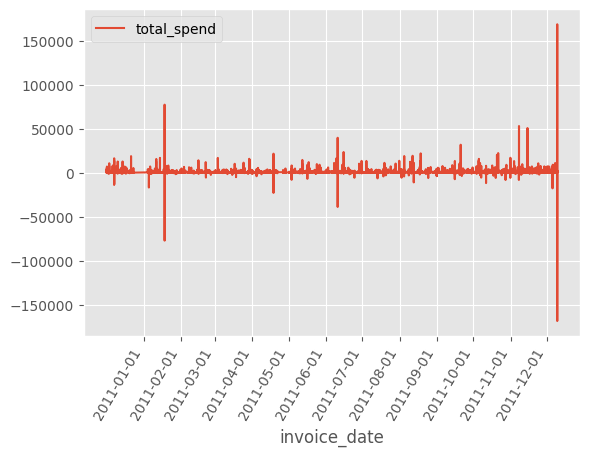

In [64]:
# sns.lineplot(x=x, y=y)
# timeseries_data['invoice_date'] = 
# sample = timeseries_data.set_index('invoice_date')
tick = ['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
sample = timeseries_data.set_index(pd.to_datetime(timeseries_data['invoice_date'], format="%Y-%m-%d"))
sample.plot()
plt.xticks(rotation=60)
plt.xticks(tick)

In [65]:
# sns.barplot(x='Description', y='total_spend', data=df_temp)

<AxesSubplot:ylabel='Description'>

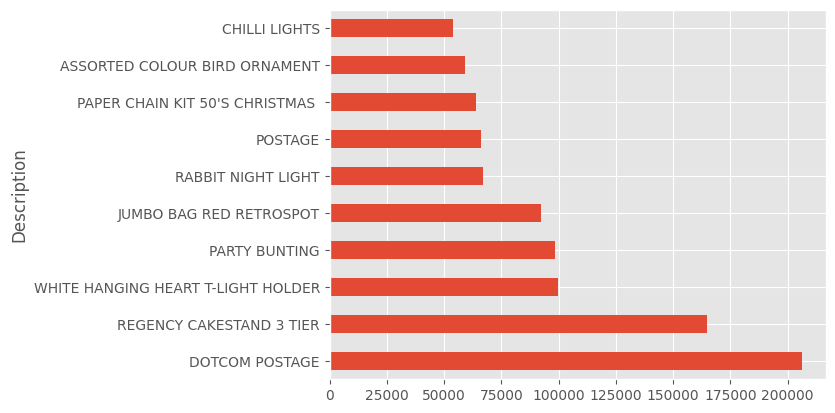

In [66]:
df_temp.groupby(['Description'])['total_spend'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [67]:
# print(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[0])
# print(pd.to_datetime(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[0], format="%Y-%m-%d"))

# print(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[1])
# print(pd.to_datetime(str(df_temp.iloc[541904]['InvoiceDate']).split(" ")[1], format="%H:%M:%S"))

# print(df_temp['InvoiceDate'].dt.hour)

In [68]:
df_temp['hour'] = pd.to_datetime(df_temp['InvoiceDate']).dt.hour
df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,20.34


In [70]:
df_temp.groupby('Country')["InvoiceNo"].count().sort_values(ascending=False).head(20)

Country
United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Unspecified           446
Austria               401
Denmark               389
Japan                 358
Name: InvoiceNo, dtype: int64

<AxesSubplot:ylabel='Country'>

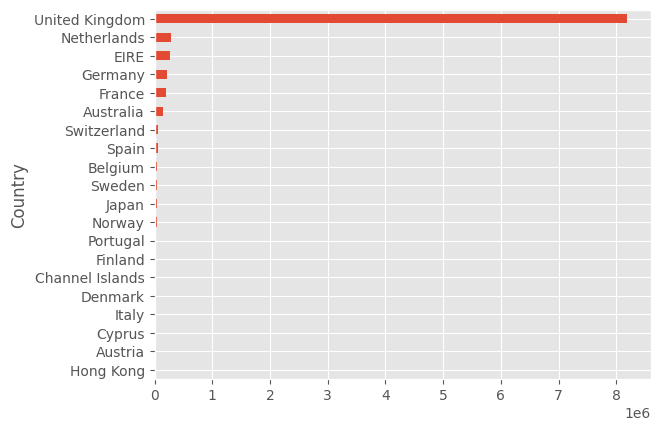

In [71]:
df_temp.groupby('Country')["total_spend"].sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:>

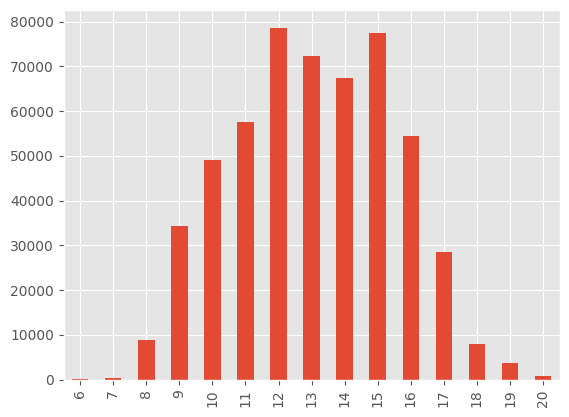

In [75]:
df_temp['hour'].value_counts().sort_index().plot(kind='bar')

Text(0.5, 1.0, 'Total Spend by Hour in United Kingdom')

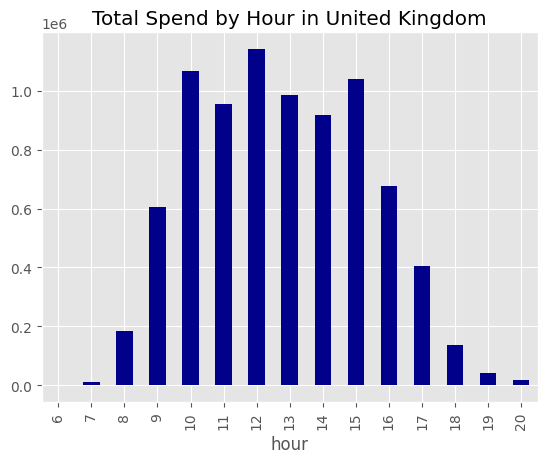

In [81]:
country = "United Kingdom"
df_temp.loc[df_temp['Country'] == f"{country}"].groupby('hour')['total_spend'].sum().plot(kind='bar', color='darkblue')
plt.title(f"Total Spend by Hour in {country}")

In [144]:
df_temp.describe()

,Quantity,UnitPrice,CustomerID,hour,total_spend
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671,13.078729,17.987795
std,218.081158,96.759853,6777.908326,2.443270,378.810824
min,-80995.000000,-11062.060000,0.000000,6.000000,-168469.600000
25%,1.000000,1.250000,12352.000000,11.000000,3.400000
50%,3.000000,2.080000,14382.000000,13.000000,9.750000
75%,10.000000,4.130000,16255.000000,15.000000,17.400000
max,80995.000000,38970.000000,18287.000000,20.000000,168469.600000


In [86]:
df_temp.loc[df_temp['Quantity'] >= 60_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,10,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,9,168469.6


In [85]:
df_temp.loc[df_temp['UnitPrice'] >= 30_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,15,-38970.0


In [148]:
df_temp['StockCode'] = df_temp['StockCode'].str.upper()

In [149]:
df_temp[df_temp['StockCode'] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend


In [150]:
df_temp[df_temp['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,15,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,15,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,0,United Kingdom,11,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,14,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,11,5.04
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,14,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,9,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,13,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,13,1.26


In [91]:
df_temp[df_temp['Description'] == 'Manual']['total_spend'].describe()

count      572.000000
mean      -120.055315
std       1833.245373
min     -38970.000000
25%        -65.947500
50%          1.000000
75%          9.315000
max       4287.630000
Name: total_spend, dtype: float64

In [97]:
df_temp['Description'].value_counts().tail(20)

did  a credit  and did not tick ret    1
michel oops                            1
MERCHANT CHANDLER CREDIT ERROR, STO    1
POSSIBLE DAMAGES OR LOST?              1
SWEETHEART KEY CABINET                 1
SET/4 2 TONE EGG SHAPE MIXING BOWLS    1
DAMAGED                                1
Incorrect stock entry.                 1
Lighthouse Trading zero invc incorr    1
BLACK GLASS/SHELL/PEARL NECKLACE       1
BAROQUE BUTTERFLY EARRINGS RED         1
ORANGE/FUSCHIA STONES NECKLACE         1
MARIE ANTOIENETT TRINKET BOX GOLD      1
Display                                1
BLACKCHRISTMAS TREE 30CM               1
Missing                                1
historic computer difference?....se    1
DUSTY PINK CHRISTMAS TREE 30CM         1
WRAP BLUE RUSSIAN FOLKART              1
PINK BERTIE MOBILE PHONE CHARM         1
Name: Description, dtype: int64

In [164]:
df_temp.loc[df_temp['Description'] == 'historic computer difference?....se']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
373660,569341,82600,historic computer difference?....se,-458,2011-10-03 14:19:00,0.0,0,United Kingdom,14,-0.0


In [154]:
df_temp.loc[df_temp['StockCode'] == '84944']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
1369,536538,84944,SET OF 6 KASHMIR FOLKART BAUBLES,2,2010-12-01 13:54:00,4.25,14594,United Kingdom,13,8.50
6402,536943,84944,SET OF 6 KASHMIR FOLKART BAUBLES,2,2010-12-03 12:11:00,4.25,17884,United Kingdom,12,8.50
10102,537225,84944,SET OF 6 KASHMIR FOLKART BAUBLES,4,2010-12-05 16:41:00,4.25,12748,United Kingdom,16,17.00
13169,537421,84944,SET OF 6 KASHMIR FOLKART BAUBLES,3,2010-12-06 15:25:00,4.25,17218,United Kingdom,15,12.75
16265,537646,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2010-12-07 15:39:00,4.25,17591,United Kingdom,15,4.25
...,...,...,...,...,...,...,...,...,...,...
428607,573486,84944,SET OF 6 KASHMIR FOLKART BAUBLES,6,2011-10-31 11:40:00,1.65,13186,United Kingdom,11,9.90
428648,573492,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2011-10-31 11:57:00,1.65,13544,United Kingdom,11,1.65
432975,573901,84944,SET OF 6 KASHMIR FOLKART BAUBLES,4,2011-11-01 14:49:00,1.65,14191,United Kingdom,14,6.60
433089,573904,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2011-11-01 14:54:00,1.65,14505,United Kingdom,14,1.65


In [126]:
df_temp.loc[df_temp['Description'] == 'Missing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
165448,550800,22458,Missing,-65,2011-04-20 14:48:00,0.0,0,United Kingdom,14,-0.0


In [128]:
df_temp.loc[df_temp['StockCode'] == '22458'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
2729,536592,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-01 17:06:00,5.06,0,United Kingdom,17,5.06
7558,537045,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-05 10:54:00,2.55,15038,United Kingdom,10,2.55
10524,537237,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-06 09:58:00,5.06,0,United Kingdom,9,5.06
14665,537608,22458,CAST IRON HOOK GARDEN FORK,2,2010-12-07 13:20:00,2.55,15024,United Kingdom,13,5.10
19921,537955,22458,CAST IRON HOOK GARDEN FORK,1,2010-12-09 11:28:00,2.55,16782,United Kingdom,11,2.55


In [100]:
df_temp[df_temp['StockCode'].str.contains('90126')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
27255,538524,90126A,PINK BERTIE MOBILE PHONE CHARM,1,2010-12-13 09:35:00,3.36,0,United Kingdom,9,3.36
265413,560225,90126C,AMBER BERTIE MOBILE PHONE CHARM,2,2011-07-15 16:27:00,3.29,0,United Kingdom,16,6.58


In [167]:
df_temp[df_temp['StockCode'].apply(lambda x: len(x) < 5)]['StockCode'].value_counts()

POST    1256
DOT      710
M        572
C2       144
D         77
S         63
CRUK      16
PADS       4
B          3
Name: StockCode, dtype: int64

In [168]:
df_temp[df_temp['StockCode'] == "M"]
# df_temp[df_temp['StockCode'].str.contains('POST')]
# df_temp[df_temp['InvoiceNo'].str.startswith('C')]
# df_temp[df_temp['StockCode'].str.contains('DOT')]['StockCode'].value_counts()
# df_temp[df_temp['StockCode'].str.contains('C2')]['Country'].value_counts()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,15,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,15,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,0,United Kingdom,11,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,14,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,11,5.04
...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,14,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,9,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,13,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,13,1.26


In [143]:
df_temp.groupby('StockCode')['Description'].value_counts().head(20)

StockCode  Description                 
10002      INFLATABLE POLITICAL GLOBE       71
           No Description                    2
10080      GROOVY CACTUS INFLATABLE         22
           No Description                    1
           check                             1
10120      DOGGY RUBBER                     30
10123C     HEARTS WRAPPING TAPE              3
           No Description                    1
10123G     No Description                    1
10124A     SPOTS ON RED BOOKCOVER TAPE       5
10124G     ARMY CAMO BOOKCOVER TAPE          4
10125      MINI FUNKY DESIGN TAPES          94
10133      COLOURING PENCILS BROWN TUBE    199
           damaged                           1
10134      No Description                    1
10135      COLOURING PENCILS BROWN TUBE    180
11001      ASSTD DESIGN RACING CAR PEN     120
15030      FAN BLACK FRAME                  13
           No Description                    1
15034      PAPER POCKET TRAVELING FAN      142
Name: Description, d

In [215]:
df_temp.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'hour', 'total_spend'],
      dtype='object')

In [212]:
most_freq = df_temp.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()
df = pd.merge(df_temp, most_freq, on='StockCode', how='left')
df = df.drop(columns=['Description_x'])
df = df.rename(columns={'Description_y': 'Description'})
df = df.reindex(columns=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'total_spend', 'hour'])

In [213]:
df_temp.loc[df_temp['Description'] == 'damaged'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
154656,549935,35915C,damaged,-43,2011-04-13 11:16:00,0.0,0,United Kingdom,11,-0.0
154799,549948,37488A,damaged,-1,2011-04-13 12:55:00,0.0,0,United Kingdom,12,-0.0
166836,550954,47013A,damaged,-2,2011-04-21 16:18:00,0.0,0,United Kingdom,16,-0.0
170484,551302,48189,damaged,-18,2011-04-27 14:55:00,0.0,0,United Kingdom,14,-0.0
180618,552331,22667,damaged,-30,2011-05-09 10:24:00,0.0,0,United Kingdom,10,-0.0


In [132]:
df_temp.loc[df_temp['StockCode'].str.contains("10123")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,total_spend
5451,536863,10123C,HEARTS WRAPPING TAPE,1,2010-12-03 11:19:00,0.65,17967,United Kingdom,11,0.65
109611,545655,10123C,HEARTS WRAPPING TAPE,3,2011-03-04 13:58:00,0.65,14670,United Kingdom,13,1.95
140929,548491,10123C,HEARTS WRAPPING TAPE,1,2011-03-31 13:14:00,0.65,14064,United Kingdom,13,0.65
150159,549349,10123G,No Description,-38,2011-04-08 11:13:00,0.00,0,United Kingdom,11,-0.00
265293,560213,10123C,No Description,-18,2011-07-15 15:05:00,0.00,0,United Kingdom,15,-0.00


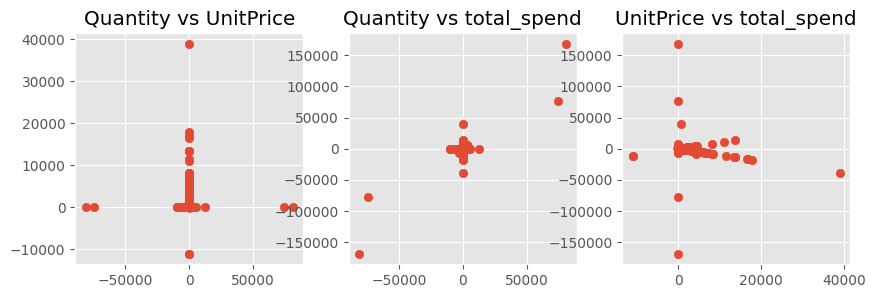

In [140]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df_temp['Quantity'], y=df_temp['UnitPrice'])
ax[0].title.set_text('Quantity vs UnitPrice')
ax[1].scatter(x=df_temp['Quantity'], y=df_temp['total_spend'])
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df_temp['UnitPrice'], y=df_temp['total_spend'])
ax[2].title.set_text('UnitPrice vs total_spend')

---

In [226]:
df = pd.read_csv("./data/uncleaned_data.csv", encoding='cp1252')

# Clean the data
# df['Description'] = df['Description'].fillna('No Description')
df['CustomerID'] = df['CustomerID'].fillna(0)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['total_spend'] = df['Quantity'] * df['UnitPrice']

df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(float).astype(int)
df['Country'] = df['Country'].astype(str)
df['total_spend'] = df['total_spend'].astype(float)

df['StockCode'] = df['StockCode'].str.upper()
most_freq = df.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()
columns_index = df.columns
df = df.drop(columns=['Description'])
df = pd.merge(df, most_freq, on='StockCode', how='left')
df = df.reindex(columns=columns_index)

# Write the cleaned data to a new csv file
# df.to_parquet("./data/cleaned_data.parquet")
df.to_parquet("./data/cleaned_data.csv")

---